# Structure factors to projected potential

In [5]:
import os
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import matplotlib.image as image
from cmap import Colormap
import scienceplots
import re

In [10]:
IMAGE_SIZE = 128
FACTOR = 1 / (IMAGE_SIZE - 1)
TWO_PI_I = complex(0, 2 * np.pi)
data_loc = "../datasets/MiniFDP"

In [11]:
@nb.njit()
def projected_potential(arr, Cug, gVec):
    for i in range(IMAGE_SIZE):
        for j in range(IMAGE_SIZE):
            for n in range(841):  # Number of lines in .txt
                ReDotgVec = i * gVec[n][0] + j * gVec[n][1]
                ExpVar = np.exp(TWO_PI_I * ReDotgVec * FACTOR)
                arr[j][i] += np.real(Cug[n] * ExpVar)

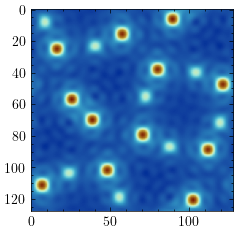

In [12]:
for ICSD_code in map(str, [163414]):
    structure_factors = np.loadtxt(
        os.path.join(data_loc, ICSD_code, ICSD_code + "_structure_factors.txt")
    )
    Cug = np.apply_along_axis(lambda row: complex(row[5], row[6]), 1, structure_factors)
    gVec = np.apply_along_axis(
        lambda row: [row[0], row[1], row[2]], 1, structure_factors
    )

    arr = np.zeros((IMAGE_SIZE, IMAGE_SIZE))
    projected_potential(arr, Cug, gVec)
    arr = arr / np.max(arr)
    np.save(os.path.join(data_loc, ICSD_code, ICSD_code + "_structure"), arr)
    image.imsave(
        os.path.join(data_loc, ICSD_code, ICSD_code + "_structure.png"),
        arr,
        cmap="Greys",
    )
    plt.imshow(arr, cmap=Colormap('crameri:roma_r').to_mpl())

Using CIFs

C:\Users\joe\AppData\Roaming\Python\Python312\site-packages\pymatgen\io\cif.py:1193: UserWarning: The default value of primitive was changed from True to False in https://github.com/materialsproject/pymatgen/pull/3419. CifParser now returns the cell in the CIF file as is. If you want the primitive cell, please set primitive=True explicitly.
  warnings.warn(


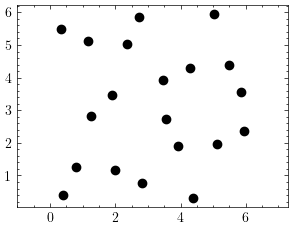

In [320]:
ICSD_code = str(163414)
cif_file = os.path.join(data_loc, ICSD_code, ICSD_code + ".cif")

from pymatgen.io.cif import CifParser
parser = CifParser(cif_file)
structure = parser.parse_structures()

fig, ax = plt.subplots()
ax.axis("equal")

for s in structure[0]:
    ax.scatter(s.x, s.y, c="k")

plt.show()

In [ ]:
DATA RKirkland(1,1:12)/4.202983240E-03,2.253508880E-01,6.277625050E-02,2.253669500E-01,3.009073470E-02,2.253317560E-01, &
          6.777566950E-02,4.388540010E+00,3.566092370E-03,4.038848230E-01,2.761358150E-02,1.444901660E+00/
      DATA RKirkland(2,1:12)/1.875437040E-05,2.124279970E-01,4.105958000E-04,3.322122790E-01,1.963000590E-01,5.173251520E-01, &
          8.360157380E-03,3.666682390E-01,2.951020220E-02,1.371718270E+00,4.659289820E-07,3.757680250E+04/
      DATA RKirkland(3,1:12)/7.458438160E-02,8.811514240E-01,7.153822500E-02,4.591429040E-02,1.453152290E-01,8.813017140E-01, &
          1.121257690E+00,1.884836650E+01,2.517365250E-03,1.591899950E-01,3.584349710E-01,6.123710000E+00/
      DATA RKirkland(4,1:12)/6.116428970E-02,9.901821320E-02,1.257550340E-01,9.902724120E-02,2.008315480E-01,1.873925090E+00, &
          7.872428760E-01,9.327949290E+00,1.588478500E-03,8.919002360E-02,2.739620310E-01,3.206876580E+00/
      DATA RKirkland(5,1:12)/1.257160660E-01,1.482588300E-01,1.733144520E-01,1.482572160E-01,1.847748110E-01,3.342273110E+00, &
          1.952502210E-01,1.973394630E+00,5.296420750E-01,5.700355530E+00,1.082305000E-03,5.648572370E-02/
      DATA RKirkland(6,1:12)/2.120807670E-01,2.086054170E-01,1.998118650E-01,2.086101860E-01,1.682543850E-01,5.578707730E+00, &
          1.420483600E-01,1.333118870E+00,3.638306720E-01,3.808002630E+00,8.350120440E-04,4.039826200E-02/
      DATA RKirkland(7,1:12)/5.330155540E-01,2.909525150E-01,5.290088830E-02,1.035478960E+01,9.241596480E-02,1.035400280E+01, &
          2.617991010E-01,2.762527230E+00,8.802621080E-04,3.476812360E-02,1.101665550E-01,9.934217360E-01/
      DATA RKirkland(8,1:12)/3.399692040E-01,3.815702800E-01,3.075701720E-01,3.815714360E-01,1.303690720E-01,1.919197450E+01, & 
          8.833260580E-02,7.606355250E-01,1.965867000E-01,2.074010940E+00,9.962200280E-04,3.032668690E-02/
      DATA RKirkland(9,1:12)/2.305605930E-01,4.807542130E-01,5.268896480E-01,4.807638950E-01,1.243467550E-01,3.953067200E+01, &
          1.246168940E-03,2.621818030E-02,7.204525550E-02,5.924955930E-01,1.530757770E-01,1.591276710E+00/
      DATA RKirkland(10,1:12)/4.083717710E-01,5.882286270E-01,4.544188580E-01,5.882886550E-01,1.445649230E-01,1.212460130E+02, &
          5.915313950E-02,4.639635400E-01,1.240037180E-01,1.234130250E+00,1.649860370E-03,2.058692170E-02/
      DATA RKirkland(11,1:12)/1.364716620E-01,4.999653010E-02,7.706778650E-01,8.818996640E-01,1.568620140E-01,1.617685790E+01, &
          9.968215130E-01,2.001326100E+01,3.803046700E-02,2.605162540E-01,1.276850890E-01,6.995593290E-01/
      DATA RKirkland(12,1:12)/3.043841210E-01,8.420143770E-02,7.562705630E-01,1.640655980E+00,1.011648090E-01,2.971429750E+01, &
          3.452034030E-02,2.165960940E-01,9.717513270E-01,1.212368520E+01,1.205930120E-01,5.608658380E-01/
      DATA RKirkland(13,1:12)/7.774194240E-01,2.710582270E+00,5.783120360E-02,7.175320980E+01,4.263864990E-01,9.133315550E-02, &
          1.134072200E-01,4.488674510E-01,7.901140350E-01,8.663667180E+00,3.232934960E-02,1.785034630E-01/
      DATA RKirkland(14,1:12)/1.065438920E+00,1.041184550E+00,1.201436910E-01,6.871133680E+01,1.809152630E-01,8.875339260E-02, &
          1.120656200E+00,3.700626190E+00,3.054528160E-02,2.140978970E-01,1.599635020E+00,9.990966380E+00/
      DATA RKirkland(15,1:12)/1.052844470E+00,1.319625900E+00,2.994402840E-01,1.284605200E-01,1.174607480E-01,1.021901630E+02, &
          9.606434520E-01,2.874775550E+00,2.635557480E-02,1.820768440E-01,1.380593300E+00,7.491655260E+00/
      DATA RKirkland(16,1:12)/1.016469160E+00,1.691819650E+00,4.417667480E-01,1.741802880E-01,1.215038630E-01,1.670110910E+02, &
          8.279666700E-01,2.303428100E+00,2.330225330E-02,1.569541500E-01,1.183028460E+00,5.857828910E+00/
      DATA RKirkland(17,1:12)/9.442211160E-01,2.400523740E-01,4.373220490E-01,9.305104390E+00,2.545479260E-01,9.304863460E+00, &
          5.477633230E-02,1.686556880E-01,8.000874880E-01,2.978497740E+00,1.074886410E-02,6.842406460E-02/
      DATA RKirkland(18,1:12)/1.069832880E+00,2.877910220E-01,4.246317860E-01,1.241569570E+01,2.438979490E-01,1.241588680E+01, &
          4.794462960E-02,1.369797960E-01,7.649589520E-01,2.439407290E+00,8.231284310E-03,5.272587490E-02/
      DATA RKirkland(19,1:12)/6.927178650E-01,7.108499900E+00,9.651610850E-01,3.575329010E-01,1.484665880E-01,3.937632750E-02, &
          2.646450270E-02,1.035913210E-01,1.808837680E+00,3.228451990E+01,5.439000180E-01,1.677913740E+00/
      DATA RKirkland(20,1:12)/3.669028710E-01,6.142741290E-02,8.663789990E-01,5.708817270E-01,6.672033000E-01,7.829656390E+00, &
          4.877436360E-01,1.325313180E+00,1.824063140E+00,2.100560320E+01,2.202484530E-02,9.118534500E-02/
      DATA RKirkland(21,1:12)/3.788717770E-01,6.989101620E-02,9.000225050E-01,5.210615410E-01,7.152889140E-01,7.877079200E+00, &
          1.886409730E-02,8.175127080E-02,4.079459490E-01,1.111413880E+00,1.617865400E+00,1.808407590E+01/
      DATA RKirkland(22,1:12)/3.623832670E-01,7.547071140E-02,9.842329660E-01,4.977573090E-01,7.417156420E-01,8.176593910E+00, &
          3.625552690E-01,9.555249060E-01,1.491593900E+00,1.622216770E+01,1.616595090E-02,7.331408390E-02/
      DATA RKirkland(23,1:12)/3.529613780E-01,8.192041030E-02,7.467910140E-01,8.811895110E+00,1.083640680E+00,5.106460750E-01, &
          1.390136100E+00,1.489018410E+01,3.312733560E-01,8.385430790E-01,1.404226120E-02,6.574326780E-02/
      DATA RKirkland(24,1:12)/1.343483790E+00,1.258143530E+00,5.070403280E-01,1.150428110E+01,4.263589550E-01,8.536603890E-02, &
          1.172418260E-02,6.001770610E-02,5.119665160E-01,1.537724510E+00,3.382858280E-01,6.624183190E-01/
      DATA RKirkland(25,1:12)/3.266976130E-01,8.888130830E-02,7.172970000E-01,1.113001980E+01,1.332124640E+00,5.821411040E-01, &
          2.808017020E-01,6.715831450E-01,1.154992410E+00,1.268253950E+01,1.119844880E-02,5.323344670E-02/
      DATA RKirkland(26,1:12)/3.134548470E-01,8.993257560E-02,6.892900160E-01,1.303660380E+01,1.471415310E+00,6.333452910E-01, &
          1.032986880E+00,1.167834250E+01,2.582802850E-01,6.091164460E-01,1.034606900E-02,4.816106270E-02/
      DATA RKirkland(27,1:12)/3.158782780E-01,9.466832460E-02,1.601390050E+00,6.994364490E-01,6.563943380E-01,1.569544030E+01, &
          9.367466240E-01,1.093924100E+01,9.775626460E-03,4.374468160E-02,2.383785780E-01,5.562864830E-01/
      DATA RKirkland(28,1:12)/1.722546300E+00,7.766069080E-01,3.295430440E-01,1.022623600E-01,6.230072000E-01,1.941562070E+01, &
          9.434965130E-03,3.986845960E-02,8.540635150E-01,1.040781660E+01,2.210735150E-01,5.108693300E-01/
      DATA RKirkland(29,1:12)/3.587745310E-01,1.061534630E-01,1.761813480E+00,1.016409950E+00,6.369050530E-01,1.536590930E+01, &
          7.449306670E-03,3.853459890E-02,1.890023470E-01,3.984277900E-01,2.296195890E-01,9.014198430E-01/
      DATA RKirkland(30,1:12)/5.708939730E-01,1.265346140E-01,1.989088560E+00,2.177819650E+00,3.060605850E-01,3.786190030E+01, &
          2.356002230E-01,3.670190410E-01,3.970611020E-01,8.664195960E-01,6.856572280E-03,3.357788230E-02/
      DATA RKirkland(31,1:12)/6.255284640E-01,1.100056500E-01,2.053029010E+00,2.410957860E+00,2.896081200E-01,4.786857360E+01, &
          2.079105940E-01,3.278072240E-01,3.450796170E-01,7.431390610E-01,6.556342980E-03,3.094113690E-02/
      DATA RKirkland(32,1:12)/5.909526900E-01,1.183759760E-01,5.399806600E-01,7.189374330E+01,2.006261880E+00,1.393048890E+00, &
          7.497050410E-01,6.899433500E+00,1.835813470E-01,3.646672320E-01,9.521907430E-03,2.698886500E-02/
      DATA RKirkland(33,1:12)/7.778752180E-01,1.507331570E-01,5.938481500E-01,1.428822090E+02,1.959187510E+00,1.747503390E+00, &
          1.798802260E-01,3.318008520E-01,8.632672220E-01,5.854902740E+00,9.590534270E-03,2.337775690E-02/
      DATA RKirkland(34,1:12)/9.583906810E-01,1.837755570E-01,6.038513420E-01,1.968192240E+02,1.908289310E+00,2.150820530E+00, &
          1.738859560E-01,3.000060240E-01,9.352651450E-01,4.924712150E+00,8.622546580E-03,2.123081080E-02/
      DATA RKirkland(35,1:12)/1.141361700E+00,2.187087100E-01,5.181187370E-01,1.939166820E+02,1.857319750E+00,2.657553960E+00, &
          1.682173990E-01,2.717199180E-01,9.757056060E-01,4.194825000E+00,7.241878710E-03,1.993257180E-02/
      DATA RKirkland(36,1:12)/3.243869700E-01,6.313179730E+01,1.317321630E+00,2.547060360E-01,1.799126140E+00,3.236683940E+00, &
          4.299614250E-03,1.989656100E-02,1.004294330E+00,3.610945130E+00,1.621881970E-01,2.455836720E-01/
      DATA RKirkland(37,1:12)/2.904453510E-01,3.684202270E-02,2.442013290E+00,1.160133320E+00,7.694354490E-01,1.695914720E+01, &
          1.586870000E+00,2.530825740E+00,2.816175930E-03,1.885774170E-02,1.286638300E-01,2.107539690E-01/
      DATA RKirkland(38,1:12)/1.373730860E-02,1.874690610E-02,1.975486720E+00,6.360792300E+00,1.592610290E+00,2.219924820E-01, &
          1.732638820E-01,2.016249580E-01,4.662803780E+00,2.530278030E+01,1.612650630E-03,1.536105680E-02/
      DATA RKirkland(39,1:12)/6.753027470E-01,6.543318470E-02,4.702867200E-01,1.061087090E+02,2.634976770E+00,2.066435400E+00, &
          1.096217460E-01,1.931319250E-01,9.603487730E-01,1.633109380E+00,5.289215550E-03,1.660838210E-02/
      DATA RKirkland(40,1:12)/2.643655050E+00,2.202026990E+00,5.542251470E-01,1.782601070E+02,7.613766250E-01,7.672187450E-02, &
          6.029468910E-03,1.551432960E-02,9.916305300E-02,1.761759950E-01,9.567820200E-01,1.543306820E+00/
      DATA RKirkland(41,1:12)/6.595328750E-01,8.661454900E-02,1.845458540E+00,5.947743980E+00,1.255844050E+00,6.408514750E-01, &
          1.222534220E-01,1.666460500E-01,7.066383280E-01,1.628532680E+00,2.623815910E-03,8.262578590E-03/
      DATA RKirkland(42,1:12)/6.101601200E-01,9.116280540E-02,1.265440000E+00,5.067760250E-01,1.974287620E+00,5.895903810E+00, &
          6.480289620E-01,1.466341080E+00,2.603808170E-03,7.843363110E-03,1.138874930E-01,1.551143400E-01/
      DATA RKirkland(43,1:12)/8.551891830E-01,1.029621510E-01,1.662196410E+00,7.649070000E+00,1.455754750E+00,1.016399870E+00, &
          1.054456640E-01,1.423033380E-01,7.716571120E-01,1.346593490E+00,2.209926350E-03,7.903589760E-03/
      DATA RKirkland(44,1:12)/4.708470930E-01,9.330298740E-02,1.581807810E+00,4.528313470E-01,2.024198180E+00,7.114890230E+00, &
          1.970362570E-03,7.561815950E-03,6.269126390E-01,1.253998580E+00,1.026413200E-01,1.337860870E-01/
      DATA RKirkland(45,1:12)/4.200515530E-01,9.388826280E-02,1.762665070E+00,4.644416870E-01,2.027356410E+00,8.193460460E+00, &
          1.454871760E-03,7.827045170E-03,6.228096000E-01,1.171941530E+00,9.915299150E-02,1.245328390E-01/
      DATA RKirkland(46,1:12)/2.104751550E+00,8.686064700E+00,2.038844870E+00,3.789244490E-01,1.820672640E-01,1.429216340E-01, &
          9.520409480E-02,1.171259000E-01,5.914452480E-01,1.078438080E+00,1.133286760E-03,7.802520920E-03/
      DATA RKirkland(47,1:12)/2.079813900E+00,9.925402970E+00,4.431707260E-01,1.049201040E-01,1.965152150E+00,6.401038390E-01, &
          5.961305910E-01,8.895947900E-01,4.780163330E-01,1.985094070E+00,9.464584700E-02,1.127444640E-01/
      DATA RKirkland(48,1:12)/1.636575490E+00,1.245403810E+01,2.179279890E+00,1.451346600E+00,7.713006900E-01,1.266957570E-01, &
          6.641938800E-01,7.776592020E-01,7.645632850E-01,1.660752100E+00,8.611266890E-02,1.057283570E-01/
      DATA RKirkland(49,1:12)/2.248206320E+00,1.519135070E+00,1.647068640E+00,1.301134240E+01,7.886792650E-01,1.061281840E-01, &
          8.125790690E-02,9.940456200E-02,6.682803460E-01,1.497420630E+00,6.384674750E-01,7.184226350E-01/
      DATA RKirkland(50,1:12)/2.166446200E+00,1.131749090E+01,6.886910210E-01,1.101312850E-01,1.924317510E+00,6.744648530E-01, &
          5.653598880E-01,7.335646100E-01,9.186838610E-01,1.023103120E+01,7.805422130E-02,9.311043080E-02/
      DATA RKirkland(51,1:12)/1.736621140E+00,8.843347190E-01,9.998713800E-01,1.384621210E-01,2.139724090E+00,1.196664320E+01, &
          5.605665260E-01,6.726728800E-01,9.937727470E-01,8.723304110E+00,7.373749820E-02,8.785777150E-02/
      DATA RKirkland(52,1:12)/2.093838820E+00,1.268568690E+01,1.569405190E+00,1.212365370E+00,1.309419930E+00,1.666332920E-01, &
          6.980678040E-02,8.308175760E-02,1.049695370E+00,7.431478570E+00,5.555943540E-01,6.174876760E-01/
      DATA RKirkland(53,1:12)/1.601869250E+00,1.950315380E-01,1.985102640E+00,1.369761830E+01,1.482262000E+00,1.803047950E+00, &
          5.538071990E-01,5.679123400E-01,1.117287220E+00,6.408798780E+00,6.607208470E-02,7.866154290E-02/
      DATA RKirkland(54,1:12)/1.600154870E+00,2.929133540E+00,1.716445810E+00,1.558829900E+01,1.849683510E+00,2.225259830E-01, &
          6.238136480E-02,7.455812230E-02,1.213875550E+00,5.560132710E+00,5.540519460E-01,5.219945210E-01/
      DATA RKirkland(55,1:12)/2.952368540E+00,6.014619520E+00,4.281057210E-01,4.641512460E+01,1.895992330E+00,1.801097560E-01, &
          5.480129380E-02,7.127996330E-02,4.708386000E+00,4.567027990E+01,5.903567190E-01,4.702363100E-01/
      DATA RKirkland(56,1:12)/3.194342430E+00,9.273522410E+00,1.982895860E+00,2.287416320E-01,1.551210520E-01,3.820002310E-02, &
          6.732223540E-02,7.309617450E-02,4.484742110E+00,2.957035650E+01,5.426744140E-01,4.086470150E-01/
      DATA RKirkland(57,1:12)/2.050364250E+00,2.203484170E-01,1.421143110E-01,3.964380560E-02,3.235381510E+00,9.569791690E+00, &
          6.346834290E-02,6.924430910E-02,3.979605860E+00,2.531784060E+01,5.201167110E-01,3.836140980E-01/
      DATA RKirkland(58,1:12)/3.229907590E+00,9.946601350E+00,1.576183070E-01,4.153786760E-02,2.134778380E+00,2.404805720E-01, &
          5.019076090E-01,3.662520190E-01,3.808890100E+00,2.432759680E+01,5.966250280E-02,6.596535030E-02/
      DATA RKirkland(59,1:12)/1.581893240E-01,3.913090560E-02,3.181419950E+00,1.041395450E+01,2.276221400E+00,2.816717570E-01, &
          3.977054720E+00,2.618729780E+01,5.584482770E-02,6.309216950E-02,4.852079540E-01,3.542343690E-01/
      DATA RKirkland(60,1:12)/1.813794170E-01,4.373247930E-02,3.176163960E+00,1.078425720E+01,2.352215190E+00,3.055718330E-01, &
          3.831257630E+00,2.547454080E+01,5.258899760E-02,6.026760730E-02,4.700907420E-01,3.390170030E-01/
      DATA RKirkland(61,1:12)/1.929868110E-01,4.377859700E-02,2.437560230E+00,3.293369960E-01,3.172485040E+00,1.112599960E+01, &
          3.581054140E+00,2.467095860E+01,4.565293940E-01,3.249902820E-01,4.948121770E-02,5.765531000E-02/
      DATA RKirkland(62,1:12)/2.120025950E-01,4.577036080E-02,3.168917540E+00,1.145365990E+01,2.515034940E+00,3.555610540E-01, &
          4.440808450E-01,3.119533630E-01,3.367421010E+00,2.402914350E+01,4.656525430E-02,5.522668190E-02/
      DATA RKirkland(63,1:12)/2.593550020E+00,3.824526120E-01,3.165575220E+00,1.176751550E+01,2.294026520E-01,4.766422490E-02, &
          4.322577800E-01,2.997198330E-01,3.172619200E+00,2.344627380E+01,4.379583170E-02,5.294406800E-02/
      DATA RKirkland(64,1:12)/3.191449390E+00,1.202246550E+01,2.557664310E+00,4.083388760E-01,3.326819340E-01,5.858198140E-02, &
          4.142431300E-02,5.067714770E-02,2.610367280E+00,1.993442440E+01,4.205268630E-01,2.856862400E-01/
      DATA RKirkland(65,1:12)/2.594074620E-01,5.046893540E-02,3.161778550E+00,1.231401830E+01,2.750957510E+00,4.383376260E-01, &
          2.792476860E+00,2.237973090E+01,3.859310010E-02,4.879209920E-02,4.108817080E-01,2.776228920E-01/
      DATA RKirkland(66,1:12)/3.160553960E+00,1.254704140E+01,2.827517090E+00,4.678990940E-01,2.751402550E-01,5.232269820E-02, &
          4.009671600E-01,2.676148840E-01,2.631108340E+00,2.194981660E+01,3.613338170E-02,4.688714970E-02/
      DATA RKirkland(67,1:12)/2.886424670E-01,5.405076870E-02,2.905672960E+00,4.975810770E-01,3.159601590E+00,1.275995050E+01, &
          3.912802590E-01,2.581518310E-01,2.485960380E+00,2.154009720E+01,3.376644780E-02,4.506643230E-02/
      DATA RKirkland(68,1:12)/3.155732130E+00,1.297290090E+01,3.115195600E-01,5.813993870E-02,2.977224060E+00,5.312133940E-01, &
          3.815638540E-01,2.491957760E-01,2.402475320E+00,2.136276160E+01,3.152242140E-02,4.332532570E-02/
      DATA RKirkland(69,1:12)/3.155919700E+00,1.312324070E+01,3.225447100E-01,5.972233230E-02,3.055690530E+00,5.618767730E-01, &
          2.928451000E-02,4.165342550E-02,3.724872050E-01,2.408219670E-01,2.278336950E+00,2.100341850E+01/
      DATA RKirkland(70,1:12)/3.107947040E+00,6.063478470E-01,3.140912210E+00,1.337052690E+01,3.756604540E-01,7.298147400E-02, &
          3.619010970E-01,2.326520510E-01,2.454090820E+00,2.126952090E+01,2.723839900E-02,3.999695970E-02/
      DATA RKirkland(71,1:12)/3.114468630E+00,1.389688810E+01,5.396343530E-01,8.917085080E-02,3.064609150E+00,6.799195630E-01, &
          2.585637450E-02,3.828085220E-02,2.139835560E+00,1.800787880E+01,3.477882310E-01,2.227065910E-01/
      DATA RKirkland(72,1:12)/3.011668990E+00,7.104018890E-01,3.162847880E+00,1.382621920E+01,6.334217710E-01,9.484865720E-02, &
          3.414171980E-01,2.141296780E-01,1.535660130E+00,1.552986980E+01,2.407237730E-02,3.678336900E-02/
      DATA RKirkland(73,1:12)/3.202368210E+00,1.384463690E+01,8.300984130E-01,1.183815810E-01,2.865522970E+00,7.663691180E-01, &
          2.248138870E-02,3.529346220E-02,1.401652630E+00,1.461488770E+01,3.337405960E-01,2.057044860E-01/
      DATA RKirkland(74,1:12)/9.249068550E-01,1.286633770E-01,2.755545570E+00,7.658264790E-01,3.304400600E+00,1.344711700E+01, &
          3.299738620E-01,1.982188950E-01,1.099164440E+00,1.350875340E+01,2.064988830E-02,3.389184590E-02/
      DATA RKirkland(75,1:12)/1.969521050E+00,4.988306200E+01,1.217266190E+00,1.332438090E-01,4.103916850E+00,1.843969160E+00, &
          2.907919780E-02,2.841928130E-02,2.306966690E-01,1.909687840E-01,6.088402990E-01,1.370903560E+00/
      DATA RKirkland(76,1:12)/2.063858670E+00,4.056716970E+01,1.296034060E+00,1.465590470E-01,3.969206730E+00,1.825615960E+00, &
          2.698354870E-02,2.841720450E-02,2.310839990E-01,1.797651840E-01,6.304667740E-01,1.389115430E+00/
      DATA RKirkland(77,1:12)/2.215227260E+00,3.244640900E+01,1.375731550E+00,1.609200480E-01,3.782444050E+00,1.787565530E+00, &
          2.446432400E-02,2.829099380E-02,2.369320160E-01,1.706923680E-01,6.484714120E-01,1.379283900E+00/
      DATA RKirkland(78,1:12)/9.846979400E-01,1.609108390E-01,2.739870790E+00,7.189716670E-01,3.616967150E+00,1.292810160E+01, &
          3.028856020E-01,1.701348540E-01,2.783707260E-01,1.498627030E+00,1.521241290E-02,2.835108220E-02/
      DATA RKirkland(79,1:12)/9.612633980E-01,1.709322770E-01,3.695810300E+00,1.293353190E+01,2.775674910E+00,6.899970700E-01, &
          2.954141760E-01,1.635255100E-01,3.114757430E-01,1.392009010E+00,1.432372670E-02,2.712653370E-02/
      DATA RKirkland(80,1:12)/1.292004910E+00,1.834328650E-01,2.751614780E+00,9.423683710E-01,3.493879490E+00,1.462356540E+01, &
          2.773046360E-01,1.551101440E-01,4.302328100E-01,1.288716700E+00,1.482943510E-02,2.619038340E-02/
      DATA RKirkland(81,1:12)/3.759647300E+00,1.350415130E+01,3.211959040E+00,6.663309930E-01,6.477678250E-01,9.225182340E-02, &
          2.761232740E-01,1.503128970E-01,3.188388100E-01,1.125655880E+00,1.316684190E-02,2.488798420E-02/
      DATA RKirkland(82,1:12)/1.007959750E+00,1.172684270E-01,3.097961530E+00,8.804532350E-01,3.612968640E+00,1.473258120E+01, &
          2.624014760E-01,1.434910140E-01,4.056219950E-01,1.041035060E+00,1.318125090E-02,2.395754150E-02/
      DATA RKirkland(83,1:12)/1.598268750E+00,1.568974710E-01,4.382339250E+00,2.470946920E+00,2.060747190E+00,5.724389720E+01, &
          1.944260230E-01,1.329791090E-01,8.227049780E-01,9.565325280E-01,2.332269530E-02,2.230384350E-02/
      DATA RKirkland(84,1:12)/1.714632230E+00,9.792628410E+01,2.141159600E+00,2.101937170E-01,4.375124130E+00,3.669488120E+00, &
          2.162166800E-02,1.984561440E-02,1.978438370E-01,1.337588070E-01,6.520479200E-01,7.804321040E-01/
      DATA RKirkland(85,1:12)/1.480477940E+00,1.259439190E+02,2.091746300E+00,1.838030080E-01,4.752460330E+00,4.198905960E+00, &
          1.856439580E-02,1.813835030E-02,2.058593750E-01,1.330354040E-01,7.135409480E-01,7.030319380E-01/
      DATA RKirkland(86,1:12)/6.300222950E-01,1.409097620E-01,3.809628810E+00,3.085155400E+01,3.897560670E+00,6.515597630E-01, &
          2.407551000E-01,1.088996720E-01,2.628685770E+00,6.423832610E+00,3.142859310E-02,2.423466990E-02/
      DATA RKirkland(87,1:12)/5.232881350E+00,8.605995360E+00,2.486042050E+00,3.045439820E-01,3.234313540E-01,3.877590960E-02, &
          2.554035960E-01,1.287177240E-01,5.536072280E-01,5.369774520E-01,5.752788890E-03,1.294177900E-02/
      DATA RKirkland(88,1:12)/1.441926850E+00,1.187408730E-01,3.552917250E+00,1.017397500E+00,3.912595860E+00,6.318147830E+01, &
          2.161735190E-01,9.558064410E-02,3.941916050E+00,3.506027320E+01,4.604226050E-02,2.208503850E-02/
      DATA RKirkland(89,1:12)/1.458641270E+00,1.077604940E-01,4.189454050E+00,8.890906490E+01,3.658661820E+00,1.050889310E+00, &
          2.084792290E-01,9.093355570E-02,3.165281170E+00,3.132977880E+01,5.238925560E-02,2.088076970E-02/
      DATA RKirkland(90,1:12)/1.190140640E+00,7.734687290E-02,2.553806070E+00,6.596936810E-01,4.681101810E+00,1.280138960E+01, &
          2.261213030E-01,1.086321940E-01,3.582505450E-01,4.567656640E-01,7.822639500E-03,1.626234740E-02/
      DATA RKirkland(91,1:12)/4.685375040E+00,1.445036320E+01,2.984137080E+00,5.564385920E-01,8.919880610E-01,6.695129140E-02, &
          2.248253840E-01,1.032353960E-01,3.044448460E-01,4.272556470E-01,9.481627080E-03,1.777306110E-02/
      DATA RKirkland(92,1:12)/4.633436060E+00,1.633772670E+01,3.181570560E+00,5.695178680E-01,8.764550750E-01,6.888600120E-02, &
          2.216854770E-01,9.842545500E-02,2.729171000E-01,4.094709170E-01,1.117372980E-02,1.862154100E-02/
      DATA RKirkland(93,1:12)/4.567738880E+00,1.909927950E+01,3.403251790E+00,5.900996340E-01,8.618419230E-01,7.032048510E-02, &
          2.197288700E-01,9.363342800E-02,2.381769030E-01,3.935548820E-01,1.383064990E-02,1.944372860E-02/
      DATA RKirkland(94,1:12)/5.456711230E+00,1.018927200E+01,1.116879060E-01,3.981313130E-02,3.302603430E+00,3.146222120E-01, &
          1.845683190E-01,1.042208600E-01,4.936442630E-01,4.630805400E-01,3.574847430E+00,2.193695420E+01/
      DATA RKirkland(95,1:12)/5.383219990E+00,1.072898570E+01,1.233432360E-01,4.151378060E-02,3.464690900E+00,3.393262080E-01, &
          1.754371320E-01,9.989323460E-02,3.398000730E+00,2.116015350E+01,4.694595190E-01,4.519969700E-01/
      DATA RKirkland(96,1:12)/5.384023770E+00,1.112114190E+01,3.498612640E+00,3.567502100E-01,1.880395470E-01,5.398535830E-02, &
          1.691431370E-01,9.600826330E-02,3.195950160E+00,1.806943890E+01,4.643930590E-01,4.363181970E-01/
      DATA RKirkland(97,1:12)/3.660906880E+00,3.844209060E-01,2.030546780E-01,5.485471310E-02,5.306975150E+00,1.171502620E+01, &
          1.609340460E-01,9.210203290E-02,3.048084010E+00,1.735253670E+01,4.436102950E-01,4.271323590E-01/
      DATA RKirkland(98,1:12)/3.941503900E+00,4.182467220E-01,5.169153450E+00,1.252017880E+01,1.619410740E-01,4.815401170E-02, &
          4.152995610E-01,4.249138560E-01,2.917613250E+00,1.908996930E+01,1.514749270E-01,8.815689250E-02/
      DATA RKirkland(99,1:12)/4.097806230E+00,4.460211450E-01,5.100793930E+00,1.317686130E+01,1.746172890E-01,5.027428290E-02, &
          2.767746580E+00,1.848153930E+01,1.444966390E-01,8.462325920E-02,4.027721090E-01,4.176401000E-01/
      DATA RKirkland(100,1:12)/4.249348200E+00,4.752639330E-01,5.035565940E+00,1.385708340E+01,1.889206130E-01,5.269751580E-02, &
          3.943560580E-01,4.111937510E-01,2.612131000E+00,1.785379050E+01,1.380019270E-01,8.127744340E-02/
      DATA RKirkland(101,1:12)/2.009429310E-01,5.483665180E-02,4.401198690E+00,5.042484340E-01,4.972501020E+00,1.457213660E+01, &
          2.475305990E+00,1.729783080E+01,3.868831970E-01,4.050438980E-01,1.319360950E-01,7.808210710E-02/
      DATA RKirkland(102,1:12)/2.160528990E-01,5.835840580E-02,4.911067990E+00,1.532642120E+01,4.548628700E+00,5.344347600E-01, &
          2.361142490E+00,1.681648030E+01,1.262772920E-01,7.503046330E-02,3.813645010E-01,3.993058520E-01/
      DATA RKirkland(103,1:12)/4.867380140E+00,1.603205200E+01,3.199744010E-01,6.708711380E-02,4.588724250E+00,5.770393730E-01, &
          1.214824480E-01,7.222758990E-02,2.316398720E+00,1.412797370E+01,3.792581370E-01,3.899734840E-01/
      DATA RKirkland(104,1:12)/1.050745810E-01,5.633772200E+00,1.569406263E+00,5.634173750E+00,7.522683675E-01,5.633293900E+00, &
          6.777566950E-02,8.777080020E-01,3.566092370E-03,8.077696460E-02,2.761358150E-02,2.889803320E-01/

Below is the script used to generate all in the dataset.

In [59]:
# import os
# import numpy as np
# import numba as nb
# import matplotlib.pyplot as plt
# import matplotlib.image as image

# current_path = os.getcwd()
# data_loc = os.path.join(current_path, "cleaned_data/")
# IMAGE_SIZE = 128
# FACTOR = 1 / (IMAGE_SIZE - 1)
# TWO_PI_I = complex(0, 2 * np.pi)


# @nb.njit()
# def get_lattice(arr, Cug, gVec):
#     for i in range(IMAGE_SIZE):
#         for j in range(IMAGE_SIZE):
#             for n in range(841):  # Number of lines in .txt
#                 ReDotgVec = i * gVec[n][0] + j * gVec[n][1]
#                 ExpVar = np.exp(TWO_PI_I * ReDotgVec * FACTOR)
#                 arr[j][i] += np.real(Cug[n] * ExpVar)


# for i, ICSD_code in enumerate(os.listdir(data_loc)):
#     structure_factors = np.loadtxt(
#         os.path.join(data_loc, ICSD_code, ICSD_code + "_structure_factors.txt")
#     )
#     Cug = np.apply_along_axis(lambda row: complex(row[5], row[6]), 1, structure_factors)
#     gVec = np.apply_along_axis(
#         lambda row: [row[0], row[1], row[2]], 1, structure_factors
#     )

#     arr = np.zeros((IMAGE_SIZE, IMAGE_SIZE))
#     get_lattice(arr, Cug, gVec)
#     arr = arr / np.max(arr)
#     np.save(os.path.join(data_loc, ICSD_code, ICSD_code + "_structure"), arr)
#     image.imsave(
#         os.path.join(data_loc, ICSD_code, ICSD_code + "_structure.png"),
#         arr,
#         cmap="Greys",
#     )
#     pattern = np.fromfile(
#         os.path.join(data_loc, ICSD_code, ICSD_code + "_+0+0+0.bin"), dtype=np.float64
#     )
#     pattern = pattern.reshape((128, 128))
#     np.save(os.path.join(data_loc, ICSD_code, ICSD_code + "_+0+0+0"), pattern)
#     image.imsave(
#         os.path.join(data_loc, ICSD_code, ICSD_code + "_+0+0+0.png"),
#         pattern,
#         cmap="Greys",
#     )